In [1]:
# 릿지(Ridge)회귀
import pandas as pd

df = pd.read_csv("C:/Users/USER/Desktop/regression220926/train.csv")
df

,ID,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,0,9 Crumlin Way,Ridgewood,520000,5,2,4.0,674,266,2007.0,35500,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230,120.0
1,1,37 Sissinghurst Crescent,Landsdale,575000,5,4,2.0,540,301,2014.0,16900,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585,NaN
2,2,24 Tees Court,Mindarie,760000,4,2,2.0,781,220,1992.0,33500,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761,111.0
3,3,31 Brentham Street,Mount Hawthorn,1230000,2,1,2.0,425,185,1938.0,3500,Leederville Station,1500,07-2020\r,6016,-31.926046,115.838181,ARANMORE CATHOLIC COLLEGE,0.484465,106.0
4,4,46/1 Corkhill Street,North Fremantle,2010000,3,2,2.0,546,186,2004.0,12900,North Fremantle Station,800,10-2017\r,6159,-32.032079,115.759626,JOHN CURTIN COLLEGE OF THE ARTS,1.869050,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,18505,36 Kentucky Boulevard,Hocking,475000,4,2,2.0,533,198,2007.0,21200,Edgewater Station,4400,04-2018\r,6065,-31.764187,115.824151,WANNEROO SECONDARY COLLEGE,1.104533,131.0
18506,18506,10 Regatta Boulevard,Champion Lakes,485000,3,2,2.0,344,237,2010.0,22100,Kelmscott Station,1900,06-2011\r,6111,-32.114990,115.992834,JOHN WOLLASTON ANGLICAN COMMUNITY SCHOOL,1.816768,40.0
18507,18507,145 Coolgardie Avenue,Redcliffe,642000,3,1,1.0,1016,110,1953.0,8900,Bassendean Station,3100,01-2018\r,6104,-31.931320,115.950060,CYRIL JACKSON SENIOR CAMPUS,2.169696,NaN
18508,18508,12 Mckenzie Road,Samson,491000,4,2,2.0,718,176,1988.0,14600,Murdoch Station,5400,03-2009\r,6163,-32.070861,115.793834,SETON CATHOLIC COLLEGE,0.208669,91.0


In [2]:
df.isnull().sum()

ID                     0
ADDRESS                0
SUBURB                 0
PRICE                  0
BEDROOMS               0
BATHROOMS              0
GARAGE              1367
LAND_AREA              0
FLOOR_AREA             0
BUILD_YEAR          1728
CBD_DIST               0
NEAREST_STN            0
NEAREST_STN_DIST       0
DATE_SOLD              0
POSTCODE               0
LATITUDE               0
LONGITUDE              0
NEAREST_SCH            0
NEAREST_SCH_DIST       0
NEAREST_SCH_RANK    6000
dtype: int64

In [3]:
df.drop(['ID','ADDRESS','NEAREST_SCH_RANK'],axis=1,inplace=True)

In [4]:
df['GARAGE'].fillna(df['GARAGE'].mean(), inplace=True)

In [5]:
df.dropna(inplace=True)
df.shape

(16782, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16782 entries, 0 to 18509
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBURB            16782 non-null  object 
 1   PRICE             16782 non-null  int64  
 2   BEDROOMS          16782 non-null  int64  
 3   BATHROOMS         16782 non-null  int64  
 4   GARAGE            16782 non-null  float64
 5   LAND_AREA         16782 non-null  int64  
 6   FLOOR_AREA        16782 non-null  int64  
 7   BUILD_YEAR        16782 non-null  float64
 8   CBD_DIST          16782 non-null  int64  
 9   NEAREST_STN       16782 non-null  object 
 10  NEAREST_STN_DIST  16782 non-null  int64  
 11  DATE_SOLD         16782 non-null  object 
 12  POSTCODE          16782 non-null  int64  
 13  LATITUDE          16782 non-null  float64
 14  LONGITUDE         16782 non-null  float64
 15  NEAREST_SCH       16782 non-null  object 
 16  NEAREST_SCH_DIST  16782 non-null  float6

In [7]:
df.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST
0,Ridgewood,520000,5,2,4.0,674,266,2007.0,35500,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230
1,Landsdale,575000,5,4,2.0,540,301,2014.0,16900,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585
2,Mindarie,760000,4,2,2.0,781,220,1992.0,33500,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761
3,Mount Hawthorn,1230000,2,1,2.0,425,185,1938.0,3500,Leederville Station,1500,07-2020\r,6016,-31.926046,115.838181,ARANMORE CATHOLIC COLLEGE,0.484465
4,North Fremantle,2010000,3,2,2.0,546,186,2004.0,12900,North Fremantle Station,800,10-2017\r,6159,-32.032079,115.759626,JOHN CURTIN COLLEGE OF THE ARTS,1.869050


In [8]:
df['SUBURB']=df['SUBURB'].astype('category')
df['NEAREST_STN']=df['NEAREST_STN'].astype('category')
df['DATE_SOLD']=df['DATE_SOLD'].astype('category')
df['NEAREST_SCH']=df['NEAREST_SCH'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16782 entries, 0 to 18509
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SUBURB            16782 non-null  category
 1   PRICE             16782 non-null  int64   
 2   BEDROOMS          16782 non-null  int64   
 3   BATHROOMS         16782 non-null  int64   
 4   GARAGE            16782 non-null  float64 
 5   LAND_AREA         16782 non-null  int64   
 6   FLOOR_AREA        16782 non-null  int64   
 7   BUILD_YEAR        16782 non-null  float64 
 8   CBD_DIST          16782 non-null  int64   
 9   NEAREST_STN       16782 non-null  category
 10  NEAREST_STN_DIST  16782 non-null  int64   
 11  DATE_SOLD         16782 non-null  category
 12  POSTCODE          16782 non-null  int64   
 13  LATITUDE          16782 non-null  float64 
 14  LONGITUDE         16782 non-null  float64 
 15  NEAREST_SCH       16782 non-null  category
 16  NEAREST_SCH_DIST  1678

In [9]:
df_all = pd.get_dummies(df, columns=['SUBURB','NEAREST_STN','DATE_SOLD','NEAREST_SCH'])
df_all.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,...,NEAREST_SCH_TRINITY COLLEGE,NEAREST_SCH_URSULA FRAYNE CATHOLIC COLLEGE,NEAREST_SCH_WANNEROO SECONDARY COLLEGE,NEAREST_SCH_WARNBRO COMMUNITY HIGH SCHOOL,NEAREST_SCH_WARWICK SENIOR HIGH SCHOOL,NEAREST_SCH_WESLEY COLLEGE,NEAREST_SCH_WILLETTON SENIOR HIGH SCHOOL,NEAREST_SCH_WOODVALE SECONDARY COLLEGE,NEAREST_SCH_YANCHEP SECONDARY COLLEGE,NEAREST_SCH_YOUTH FUTURES COMMUNITY SCHOOL
0,520000,5,2,4.0,674,266,2007.0,35500,3000,6030,...,0,0,0,0,0,0,0,0,0,0
1,575000,5,4,2.0,540,301,2014.0,16900,8100,6065,...,0,0,0,0,0,0,0,0,0,0
2,760000,4,2,2.0,781,220,1992.0,33500,3500,6030,...,0,0,0,0,0,0,0,0,0,0
3,1230000,2,1,2.0,425,185,1938.0,3500,1500,6016,...,0,0,0,0,0,0,0,0,0,0
4,2010000,3,2,2.0,546,186,2004.0,12900,800,6159,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_all.iloc[:,1:],df_all['PRICE'],random_state=17)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaeld = sc.fit_transform(x_test)

In [20]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=3)
ridge.fit(x_train,y_train)

Ridge(alpha=3)

In [21]:
ridge.score(x_train,y_train)
# alpha= 1 -> 0.8119108215406925
# alpha= 0.5 -> 0.8154206958258413
# alpha= 3 -> 0.8011167017645782

0.8011167017645782

In [22]:
ridge.score(x_test,y_test)
# alpha= 1 -> 0.7811048769413866
# alpha= 0.5 -> 0.780694821973793
# alpha= 3 -> 0.7786211418001604

0.7786211418001604

In [74]:
import matplotlib.pyplot as plt

alpha = [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 1, 2, 3]
train_scores = []
test_scores = []

for i in alpha:
    ridge = Ridge(alpha = i)
    ridge.fit(x_train,y_train)
    
    train_scores.append(ridge.score(x_train,y_train))
    test_scores.append(ridge.score(x_test,y_test))

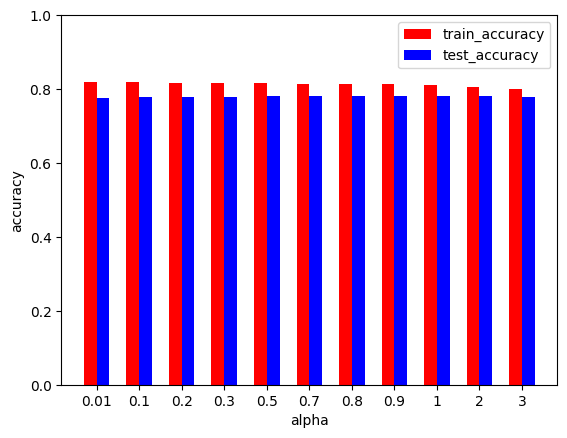

In [75]:
import numpy as np
x = np.arange(len(train_scores))

plt.bar(x,train_scores,width=0.3,color="red",align='center',label='train_accuracy')
plt.bar(x+0.3,test_scores,width=0.3,color="blue",align='center',label='test_accuracy')

plt.xticks(x+0.3/2,alpha)
plt.ylim(0,1)
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [77]:
(max(train_scores), max(test_scores))

(0.8182586201494376, 0.7811308250150493)

# 라쏘

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_all.iloc[:,1:],df_all['PRICE'],random_state=17)

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaeld = sc.fit_transform(x_test)

In [31]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=3)
lasso.fit(x_train,y_train)

C:\Project\AI_Source\AI_01\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.504e+14, tolerance: 1.595e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=3)

In [32]:
lasso.score(x_train,y_train)
# alpha=1 -> 0.8181907455567026
# alpha=0.5 -> 0.8182411868996463
# alpha=3 -> 0.817827314204183

0.817827314204183

In [33]:
lasso.score(x_test,y_test)
# alpha=1 -> 0.7712646468396192
# alpha=0.5 -> 0.7700181011901007
# alpha=3 -> 0.773008399476467

0.773008399476467

# Elastic-net

In [34]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_all.iloc[:,1:],df_all['PRICE'],random_state=17)

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaeld = sc.fit_transform(x_test)

In [54]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1,l1_ratio=0.7)
elastic.fit(x_train,y_train)

ElasticNet(alpha=0.1, l1_ratio=0.7)

In [55]:
elastic.score(x_train,y_train)
# alpha=1.0,l1_ratio=0.5 -> 0.5096501125981479
# alpha=1.0,l1_ratio=0.3 -> 0.5024147150593257
# alpha=1.0,l1_ratio=0.7 -> 0.52353211276405

# alpha=0.5,l1_ratio=0.7 -> 0.5486870253822067
# alpha=0.1,l1_ratio=0.7 -> 0.6358925110744935

0.6358925110744935

In [56]:
elastic.score(x_test,y_test)
# alpha=1.0,l1_ratio=0.5 -> 0.5161050952885833
# alpha=1.0,l1_ratio=0.3 -> 0.5085854645849395
# alpha=1.0,l1_ratio=0.7 -> 0.5304347099996152

# alpha=0.5,l1_ratio=0.7 -> 0.5562283691195349
# alpha=0.1,l1_ratio=0.7 -> 0.6449825687932864

0.6449825687932864